# Enunciado Laboratorio 1: Operaciones

## Objetivos

Con esta actividad reforzarás tus conceptos aprendidos hasta el momento en el curso y comenzarás a explorar una de las herramientas para la computación cuántica.

## Pautas de elaboración

La actividad consiste en familiarizarse con el entorno de Python y con librerías como Numpy. Adicionalmente, usaremos Qiskit, una de las herramientas para la computación cuántica, por lo que la actividad se dividirá en dos partes:

- La primera, en la que hacemos uso de NumPy.
- La segunda, en la que, además, utilizaremos Qiskit.

Para ello, vamos a realizar las operaciones que se han aprendido hasta el momento durante la primera parte del curso, entre ellas: identificar una matriz normal, hermitiana, unitaria y el producto tensorial entre matrices y vectores.

## Operaciones con Matrices

### Utilizando NumPy, Cmath y Math

Considere las siguientes matrices:

$ A = \begin{bmatrix} 9i & 2+i & 6-2i \\ -2+i & 4i & -7+7i \\ -6-2i & 7+7i & -2i \end{bmatrix} $

$ B = \begin{bmatrix} 1+i & 1+2i & 1+3i \\ 2+i & 2+2i & 2+3i \\ 3+i & 3+2i & 3+3i \end{bmatrix} $

$ C = \begin{bmatrix} 2i & 1+i & 4+i & -2i 
                 \\ -1+i & 3i & 4+7i & 1-i 
                 \\ -4+i & -4+7i & -9i & 3-4i 
                 \\ 2i & -1+i & -3-4i & -5i \end{bmatrix} $

$ D = \begin{bmatrix} i & 0 \\ 0 & 3-5i \end{bmatrix} $

### Resultados a Obtener

1. Forma polar de cada determinante y traza de cada matriz.
2. $2i(\text{det}(D) + \text{tr}(C))AB - (1+i)\det(C)\text{tr}(D)BA$.
3. La inversa de cada matriz, si existe.
4. Usando la definición y, al mismo tiempo, las propiedades de los valores propios, clasifica cada una de las matrices en normales, hermitianas o unitarias.

### Utilizando NumPy y Qiskit

### Vectores Estados $C^2: |0\rangle, |1\rangle$

1. Crear los vectores estados $C^2: |0\rangle, |1\rangle$.
2. Hallar los estados $|+\rangle, |-\rangle, |i+\rangle, |i-\rangle$ y los estados de Bell.

### Vectores Estado $C^4$

1. Encontrar la base computacional de $C^4$, por ejemplo, $|10\rangle$.

### Vectores Específicos

1. Hallar los vectores $\frac{1}{\sqrt{2}}|000\rangle + \frac{1}{\sqrt{2}}|111\rangle$, $\frac{i}{\sqrt{2}}|000\rangle - \frac{1}{\sqrt{2}}|111\rangle$, y $\frac{1}{\sqrt{2}}|000\rangle + \frac{i}{\sqrt{2}}|111\rangle$.



# Desarrollo

En esta sección se desarrolla la actividad propuesta.

## Importación de librerías

Importamos las librerías que vamos a utilizar en la actividad: 

* Numpy: para operaciones matriciales.
* Cmath: para operaciones matemáticas complejas.
* Math: para operaciones matemáticas.
* Qiskit: para operaciones cuánticas.

In [162]:
import numpy as np
import cmath as cm
import math as m
import qiskit as qk
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import circuit_drawer, plot_state_qsphere

# Matplotlib for plotting
import matplotlib.pyplot as plt
#%matplotlib inline

## Operaciones con Matrices

Definiremos las matrices $A$, $B$, $C$ y $D$.

In [87]:
# Definimos las matrices A, B, C y D

A = np.array([
    [9j, 2 + 1j, 6 - 2j],
    [-2 + 1j, 4j, -7 + 7j],
    [-6 - 2j, 7 + 7j, -2j],
])

B = np.array([
    [1 + 1j, 1 + 2j, 1 + 3j],
    [2 + 1j, 2 + 2j, 2 + 3j],
    [3 + 1j, 3 + 2j, 3 + 3j],
])

C = np.array([[2j, 1+1j, 4+1j, -2j],
              [-1+1j, 3j, 4+7j, 1-1j],
              [-4+1j, -4+7j, -9j, 3-4j],
              [2j, -1+1j, -3-4j, -5j]
])


D = np.array([
    [1j, 0],
    [0, 3 - 5j],
])

# Imprimir las matrices
print("Matriz A:")
print(A)

print("\nMatriz B:")
print(B)

print("\nMatriz C:")
print(C)

print("\nMatriz D:")
print(D)

Matriz A:
[[ 0.+9.j  2.+1.j  6.-2.j]
 [-2.+1.j  0.+4.j -7.+7.j]
 [-6.-2.j  7.+7.j -0.-2.j]]

Matriz B:
[[1.+1.j 1.+2.j 1.+3.j]
 [2.+1.j 2.+2.j 2.+3.j]
 [3.+1.j 3.+2.j 3.+3.j]]

Matriz C:
[[ 0.+2.j  1.+1.j  4.+1.j -0.-2.j]
 [-1.+1.j  0.+3.j  4.+7.j  1.-1.j]
 [-4.+1.j -4.+7.j -0.-9.j  3.-4.j]
 [ 0.+2.j -1.+1.j -3.-4.j -0.-5.j]]

Matriz D:
[[0.+1.j 0.+0.j]
 [0.+0.j 3.-5.j]]


### 1. Forma polar de cada determinante y traza de cada matriz.

Para obtener el determinante de una matriz, utilizamos la función `np.linalg.det()` de Numpy. Para obtener la traza de una matriz, utilizamos la función `np.trace()` de Numpy.

Utilizaremos la funcion round() para redondear los valores obtenidos.

Para obtener la forma polar de un número complejo, utilizaremos la función `cmath.polar()` de Cmath. Donde la función `cmath.polar()` devuelve un par de valores, el primero es el radio y el segundo es el ángulo en radianes.

In [88]:
# Calculamos la forma polar del determinante de cada matriz con 2 decimales de precisión
print("\nForma polar del determinante de A:")
print(cm.polar(np.round(np.linalg.det(A),3)))

print("\nForma polar del determinante de B:")
print(cm.polar(np.round(np.linalg.det(B),3)))

print("\nForma polar del determinante de C:")
print(cm.polar(np.round(np.linalg.det(C),3)))

print("\nForma polar del determinante de D:")
print(cm.polar(np.round(np.linalg.det(D),3)))

# Forma polar de la traza de cada matriz con 2 decimales de precisión
print("\nForma polar de la traza de A:")
print(cm.polar(np.round(np.trace(A),3)))

print("\nForma polar de la traza de B:")
print(cm.polar(np.round(np.trace(B),3)))

print("\nForma polar de la traza de C:")
print(cm.polar(np.round(np.trace(C),3)))

print("\nForma polar de la traza de D:")
print(cm.polar(np.round(np.trace(D),3)))



Forma polar del determinante de A:
(1104.0, 1.5707963267948966)

Forma polar del determinante de B:
(0.0, -3.141592653589793)

Forma polar del determinante de C:
(295.16266701600324, 0.2047043998027825)

Forma polar del determinante de D:
(5.830951894845301, 0.5404195002705842)

Forma polar de la traza de A:
(11.0, 1.5707963267948966)

Forma polar de la traza de B:
(8.48528137423857, 0.7853981633974483)

Forma polar de la traza de C:
(9.0, -1.5707963267948966)

Forma polar de la traza de D:
(5.0, -0.9272952180016122)


2. $2i(\text{det}(D) + \text{tr}(C))AB - (1+i)\det(C)\text{tr}(D)BA$.

Para la obtención del resultado de la expresión propuesta, necesitamos realizar multiplicaciones de matrices. Para ello haremos uso de la función `np.dot()` de Numpy.


In [89]:
# Calcularemos la siguiente expresión: 2i(det(D) + tr(C))AB - (1+i)det(C)tr(D)BA

# Primero calculamos el determinante de C y la traza de D
detC = np.linalg.det(C)
trD = np.trace(D)
AB = A.dot(B)
BA = B.dot(A)

# Calculamos la expresión
exp = 2j*(detC + trD)*AB - (1 + 1j)*detC*trD*BA

# Imprimimos el resultado
print("\nResultado de la expresión:")
print(exp)



Resultado de la expresión:
[[16085. +37585.j 35392. -69002.j -2786.  +6916.j]
 [34613.  -7543.j 29409.-125121.j 21258. -29578.j]
 [56021.  +1769.j  9082.-122232.j 13734.  -2496.j]]


### 3. La inversa de cada matriz, si existe.

In [90]:
# Calculamos las inversas si el determinante es distinto de 0
if abs(np.round(np.linalg.det(A),3)) != 0:
    print("\nInversa de A:")
    print(np.round(np.linalg.inv(A),3))
else:
    print("\nLa matriz A no tiene inversa")

if abs(np.round(np.linalg.det(B),3)) != 0:
    print("\nInversa de B:")
    print(np.round(np.linalg.inv(B),3))
else:
    print("\nLa matriz B no tiene inversa")

if abs(np.round(np.linalg.det(C),3)) != 0:
    print("\nInversa de C:")
    print(np.round(np.linalg.inv(C),3))
else:
    print("\nLa matriz C no tiene inversa")

if abs(np.round(np.linalg.det(D),3)) != 0:
    print("\nInversa de D:")
    print(np.round(np.linalg.inv(D),3))
else:
    print("\nLa matriz D no tiene inversa")



Inversa de A:
[[-0.   -0.096j  0.029-0.049j -0.015+0.026j]
 [-0.029-0.049j  0.   -0.053j  0.066-0.048j]
 [ 0.015+0.026j -0.066-0.048j -0.   +0.028j]]

La matriz B no tiene inversa

Inversa de C:
[[-0.365-1.291j  0.683+0.44j  -0.064-0.091j  0.094+0.403j]
 [-0.44 +0.23j   0.111-0.331j -0.068-0.079j  0.095+0.056j]
 [ 0.061+0.043j -0.006-0.078j  0.008+0.04j  -0.022-0.037j]
 [-0.354-0.556j  0.413+0.191j -0.054-0.093j  0.085+0.408j]]

Inversa de D:
[[0.   -1.j    0.   +0.j   ]
 [0.   +0.j    0.088+0.147j]]


### 4. Usando la definición y, al mismo tiempo, las propiedades de los valores propios, clasifica cada una de las matrices en normales, hermitianas o unitarias.

* Para que una matriz sea considerada una matriz hermitica debe cumplir que sus autovalores sean reales.

* Para que una matriz sea considerada una matriz unitaria debe cumplir que sus autovalores sean de magnitud 1.

* Para que una matriz sea considerada una matriz normal debe cumplir que conmute con su adjunta.

Estas condiciones las evaluaremos obtenidno los autovalores de cada matriz y comprobando que se cumplan las condiciones mencionadas. Para obtener dichos autovalores usaremos la función `np.linalg.eigvals()` de Numpy, para obtener la adjunta de una matriz usaremos la función `np.conj()` de Numpy y luego `.T` para obtener su transpuesta.

In [91]:
# Si la matriz es normal, entonces conmuta con su adjunta
# Si los autovalores son todos reales, entonces la matriz es hermítica
# Si los autovalores tienen un modulo igual a 1, entonces la matriz es unitaria

# Comprobamos si las matrices son normales, hermíticas y unitarias. Para ello haremos una función que compruebe si una matriz es normal, 
# hermítica o unitaria o varias de ellas en función de las caracteristicas de sus autovalores

def propiedades(matriz):
    """
    Comprueba si una matriz es normal, hermítica o unitaria o varias de ellas en función de las caracteristicas de sus autovalores

    Args:
        matriz (array): matriz a comprobar
    
    Returns:
        None
    """ 

    # Calculamos los autovalores de la matriz
    eig = np.round(np.linalg.eigvals(matriz),3)
    print("\nAutovalores de la matriz:")
    print(eig)

    # Si la matriz es normal, entonces conmuta con su adjunta
    if np.allclose(matriz.dot(matriz.conj().T), matriz.conj().T.dot(matriz)):
        print("\nLa matriz es normal")
    else:
        print("\nLa matriz no es normal")
    
    # Si los autovalores son todos reales, entonces la matriz es hermítica
    if np.all(np.isreal(eig)):
        print("\nLa matriz es hermítica")
    else:
        print("\nLa matriz no es hermítica")
    
    # Si los distintos autovalores tienen modulo 1, entonces la matriz es unitaria
    unitaria = True
    for i in range(len(eig)):
        if np.round(abs(eig[i]),3) != 1:
            unitaria = False
    if unitaria:
        print("\nLa matriz es unitaria")
    else:
        print("\nLa matriz no es unitaria")



Comprobamos las distintas matrices:

* Matriz A: $ A = \begin{bmatrix} 9i & 2+i & 6-2i \\ -2+i & 4i & -7+7i \\ -6-2i & 7+7i & -2i \end{bmatrix} $

In [92]:
# Comprobamos las propiedades de las matrices A, B, C y D
print("\nPropiedades de la matriz A:")
propiedades(A)


Propiedades de la matriz A:

Autovalores de la matriz:
[ 0.-10.795j -0. +6.838j -0.+14.957j]

La matriz es normal

La matriz no es hermítica

La matriz no es unitaria


* Matriz B: $ B = \begin{bmatrix} 1+i & 1+2i & 1+3i \\ 2+i & 2+2i & 2+3i \\ 3+i & 3+2i & 3+3i \end{bmatrix} $

In [93]:
print("\nPropiedades de la matriz B:")
propiedades(B)


Propiedades de la matriz B:

Autovalores de la matriz:
[ 6.464+6.464j -0.464-0.464j  0.   +0.j   ]

La matriz es normal

La matriz no es hermítica

La matriz no es unitaria


* Matriz C: $ C = \begin{bmatrix} 2i & 1+i & 4+i & -2i 
                 \\ -1+i & 3i & 4+7i & 1-i 
                 \\ -4+i & -4+7i & -9i & 3-4i 
                 \\ 2i & -1+i & -3-4i & -5i \end{bmatrix} $

In [94]:

print("\nPropiedades de la matriz C:")
propiedades(C)


Propiedades de la matriz C:

Autovalores de la matriz:
[-0.187-15.48j   0.002 +8.908j -0.088 +0.68j   0.273 -3.108j]

La matriz no es normal

La matriz no es hermítica

La matriz no es unitaria


* Matriz D: $ D = \begin{bmatrix} i & 0 \\ 0 & 3-5i \end{bmatrix} $

In [95]:

print("\nPropiedades de la matriz D:")
propiedades(D)


Propiedades de la matriz D:

Autovalores de la matriz:
[0.+1.j 3.-5.j]

La matriz es normal

La matriz no es hermítica

La matriz no es unitaria


Otra forma de evaluar las propiedades de las matrices es mediante la definición de hermiticidad, unitariedad y normalidad.

* Una matriz es hermitica si es igual a su adjunta.

* Una matriz es unitaria si su adjunta es igual a su inversa.

* Una matriz es normal si conmuta con su adjunta.

Implementaremos una función que nos permita evaluar las propiedades de las matrices segun estas definiciones.

In [96]:
# Si la matriz es normal, entonces conmuta con su adjunta
# Si la matriz es hermítica, entonces es igual a su adjunta
# Si la matriz es unitaria, entonces su adjunta es igual a su inversa

# Comprobamos si las matrices son normales, hermíticas y unitarias. Para ello haremos una función que compruebe si una matriz es normal,
# hermítica o unitaria o varias de ellas en función de las caracteristicas de sus autovalores

def propiedades2(matriz):
    """
    Comprueba si una matriz es normal, hermítica o unitaria o varias de ellas en función de sus caracteristicas

    Args:
        matriz (array): matriz a comprobar
    
    Returns:
        None
    """ 

    # Calculamos los autovalores de la matriz
    eig = np.round(np.linalg.eigvals(matriz),3)
    print("\nAutovalores de la matriz:")
    print(eig)

    # Si la matriz es normal, entonces conmuta con su adjunta
    if np.allclose(matriz.dot(matriz.conj().T), matriz.conj().T.dot(matriz)):
        print("\nLa matriz es normal")
    else:
        print("\nLa matriz no es normal")
    
    # Si la matriz es hermítica, entonces es igual a su adjunta
    if np.allclose(matriz, matriz.conj().T):
        print("\nLa matriz es hermítica")
    else:
        print("\nLa matriz no es hermítica")
    
    # Si la matriz es unitaria, entonces su adjunta es igual a su inversa
    if np.allclose(matriz.conj().T, np.linalg.inv(matriz)):
        print("\nLa matriz es unitaria")
    else:
        print("\nLa matriz no es unitaria")

Compararemos los resultados obtenidos con los resultados obtenidos anteriormente.

* Matriz A: $ A = \begin{bmatrix} 9i & 2+i & 6-2i \\ -2+i & 4i & -7+7i \\ -6-2i & 7+7i & -2i \end{bmatrix} $

In [97]:
print("\nPropiedades de la matriz A:")
propiedades2(A)


Propiedades de la matriz A:

Autovalores de la matriz:
[ 0.-10.795j -0. +6.838j -0.+14.957j]

La matriz es normal

La matriz no es hermítica

La matriz no es unitaria


* Matriz B: $ B = \begin{bmatrix} 1+i & 1+2i & 1+3i \\ 2+i & 2+2i & 2+3i \\ 3+i & 3+2i & 3+3i \end{bmatrix} $

In [98]:
print("\nPropiedades de la matriz B:")
propiedades2(B)


Propiedades de la matriz B:

Autovalores de la matriz:
[ 6.464+6.464j -0.464-0.464j  0.   +0.j   ]

La matriz es normal

La matriz no es hermítica

La matriz no es unitaria


* Matriz C: $ C = \begin{bmatrix} 2i & 1+i & 4+i & -2i 
                 \\ -1+i & 3i & 4+7i & 1-i 
                 \\ -4+i & -4+7i & -9i & 3-4i 
                 \\ 2i & -1+i & -3-4i & -5i \end{bmatrix} $

In [99]:
print("\nPropiedades de la matriz C:")
propiedades2(C) 


Propiedades de la matriz C:

Autovalores de la matriz:
[-0.187-15.48j   0.002 +8.908j -0.088 +0.68j   0.273 -3.108j]

La matriz no es normal

La matriz no es hermítica

La matriz no es unitaria


* Matriz D: $ D = \begin{bmatrix} i & 0 \\ 0 & 3-5i \end{bmatrix} $

In [100]:
print("\nPropiedades de la matriz D:")
propiedades2(D)


Propiedades de la matriz D:

Autovalores de la matriz:
[0.+1.j 3.-5.j]

La matriz es normal

La matriz no es hermítica

La matriz no es unitaria


Podemos observar como los resultados obtenidos son los mismos que los obtenidos anteriormente.

Demostrando así que los m´etodos utilizados son correctos y equivalentes.

## Vectores Estados $C^2: |0\rangle, |1\rangle$

### 1. Crear los vectores estados $C^2: |0\rangle, |1\rangle$.

Para crear los vectores estados $C^2: |0\rangle, |1\rangle$ haremos uso del paquete Qiskit y de la función `Statevector()`. Esta función nos permite crear un vector de estado a partir de una lista de valores complejos.

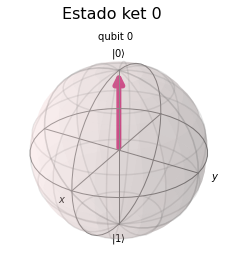

In [113]:
# Creamos los vectores de estado 0 y 1

ket0 = qk.quantum_info.Statevector([1,0])
ket1 = qk.quantum_info.Statevector([0,1])

# Representamos los estados creados en la esfera de Bloch
plot_bloch_multivector(ket0, title="Estado ket 0")

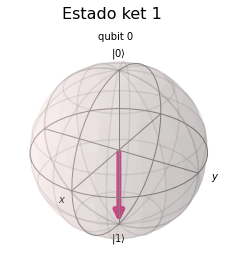

In [114]:
# Representamos los estados creados en la esfera de Bloch
plot_bloch_multivector(ket1, title="Estado ket 1")

Podemo sobservar como de manera visual, el estado ket 0 se representa en el polo norte de la esfera de Bloch, mientras que el estado ket 1 se representa en el polo sur de la esfera de Bloch. La forma en la que hemos creado estos estados es de forma manual, pero también podemos crearlos de forma más paramétrica con un circuito cuántico con una compuerta X. 

Vamos a ver estas implementaciones:

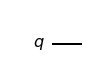

In [124]:
# Crearemos los estados 0 y 1 usando un pequeño circuito cuántico
# Creamos un circuito cuántico con 1 qubit
circuito0 = qk.QuantumCircuit(1)

# Representamos el circuito
circuito0.draw(output="mpl")


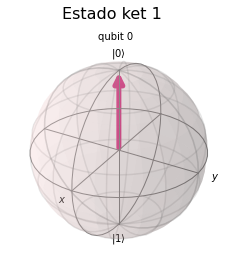

In [119]:
# Ejecutamos el circuito
ket0 = qk.execute(circuito, backend=qk.Aer.get_backend("statevector_simulator")).result().get_statevector()

# Representamos el estado
plot_bloch_multivector(ket0, title="Estado ket 1")

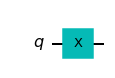

In [126]:
# Crearemos los estados 0 y 1 usando un pequeño circuito cuántico
# Creamos un circuito cuántico con 1 qubit
circuito1 = qk.QuantumCircuit(1)

# Añadimos una puerta X al circuito
circuito1.x(0)

# Representamos el circuito
circuito1.draw(output="mpl")


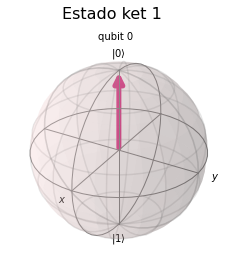

In [125]:
# Ejecutamos el circuito
ket1 = qk.execute(circuito, backend=qk.Aer.get_backend("statevector_simulator")).result().get_statevector()

# Representamos el estado
plot_bloch_multivector(ket1, title="Estado ket 1")

### 2. Hallar los estados $|+\rangle, |-\rangle, |i+\rangle, |i-\rangle$ y los estados de Bell.

Utilizaremos esta metodología para crear los estados $|+\rangle, |-\rangle, |i+\rangle, |i-\rangle$ y los estados de Bell.

#### 1. $|+\rangle$:

El estado $|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ se puede obtener aplicando la compuerta Hadamard al estado $|0\rangle$.

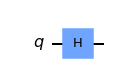

In [129]:
# Creamos un circuito cuántico con 1 qubits
circuito = qk.QuantumCircuit(1)

# Aplicamos una puerta Hadamard al primer qubit
circuito.h(0)

# Representamos el circuito
circuito.draw(output="mpl")


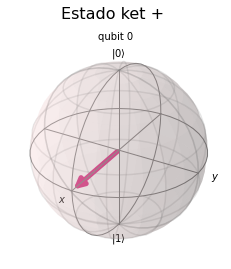

In [130]:
# Evaluamos el circuito
ket_plus = qk.execute(circuito, backend=qk.Aer.get_backend("statevector_simulator")).result().get_statevector()

# Representamos el estado
plot_bloch_multivector(ket_plus, title="Estado ket +")

#### 2. $|-\rangle$:

El estado $|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$ se puede obtener aplicando la compuerta Hadamard al estado $|1\rangle$.

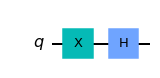

In [131]:
# Creamos un circuito cuántico con 1 qubits
circuito = qk.QuantumCircuit(1)

# Aplicamos una puerta X y una Hadamard al primer qubit
circuito.x(0)
circuito.h(0)

# Representamos el circuito
circuito.draw(output="mpl")

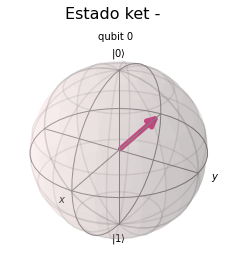

In [132]:
# Evaluamos el circuito
ket_minus = qk.execute(circuito, backend=qk.Aer.get_backend("statevector_simulator")).result().get_statevector()

# Representamos el estado
plot_bloch_multivector(ket_minus, title="Estado ket -")

#### 3. $|i+\rangle$:

El estado $|i+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle)$ se puede obtener aplicando la compuerta Hadamard al estado $|0\rangle$ y luego aplicando la compuerta S al estado resultante.

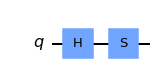

In [133]:
# Creamos un circuito cuántico con 1 qubits
circuito = qk.QuantumCircuit(1)

# Aplicamos una puerta Hadamard y una puerta S
circuito.h(0)
circuito.s(0)

# Representamos el circuito
circuito.draw(output="mpl")


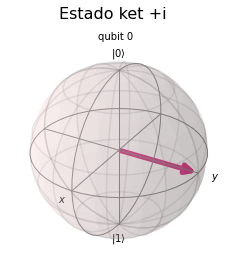

In [134]:
# Evaluamos el circuito
ket_plus_i = qk.execute(circuito, backend=qk.Aer.get_backend("statevector_simulator")).result().get_statevector()

# Representamos el estado
plot_bloch_multivector(ket_plus_i, title="Estado ket +i")

#### 4. $|i-\rangle$:

El estado $|i-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)$ se puede obtener aplicando la compuerta Hadamard al estado $|1\rangle$ y luego aplicando la compuerta S al estado resultante.

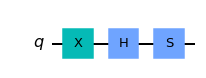

In [135]:
# Creamos un circuito cuántico con 1 qubits
circuito = qk.QuantumCircuit(1)

# Aplicamos una puerta X, una Hadamard y una puerta S
circuito.x(0)
circuito.h(0)
circuito.s(0)

# Representamos el circuito
circuito.draw(output="mpl")

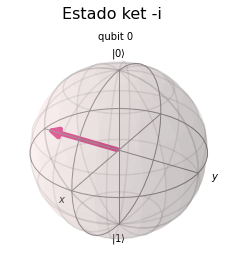

In [136]:
# Evaluamos el circuito
ket_minus_i = qk.execute(circuito, backend=qk.Aer.get_backend("statevector_simulator")).result().get_statevector()

# Representamos el estado
plot_bloch_multivector(ket_minus_i, title="Estado ket -i")

#### 5. Estados de Bell:

Los estados de Bell son cuatro estados cuánticos que forman una base ortonormal del espacio de Hilbert de dos qubits. Estos estados son importantes porque son estados maximamente entrelazados. Los estados de Bell son:

* $|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ -> B1
* $|\Phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$ -> B2
* $|\Psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$ -> B3
* $|\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$ -> B4

Implementaremos una función que nos permita obtener estos estados.

In [157]:
# Crearemos una función que nos devuelva el circuito correspondiente al estado de bell elegido

def bell(estado):
    """
    Devuelve el estado de Bell elegido

    Args:
        estado (char): estado de Bell elegido

    Returns:
        statevector: estado de Bell elegido
    """
    # Creamos un circuito cuántico con 2 qubits
    circuito = qk.QuantumCircuit(2)

    if estado == "b1":
        circuito.h(0)
        circuito.cx(0,1)
    elif estado == "b2":
        circuito.x(0)
        circuito.h(0)
        circuito.cx(0,1)

    elif estado == "b3":
        circuito.x(1)
        circuito.h(0)
        circuito.cx(0,1)

    elif estado == "b4":
        circuito.x(1)
        circuito.h(0)
        circuito.z(1)
        circuito.z(0)
        circuito.cx(0,1)

    else:
        print("No existe ese estado de Bell")
        return None

    # Devolvemos el estado de Bell elegido
    return circuito



Una vez definida la función que nos creará los circuitos generadores de los estados de Bell, vamos a obtenerlos.

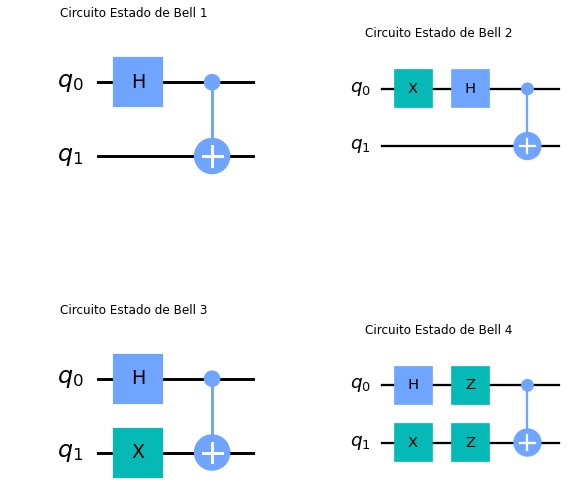

In [161]:
# Dibuja los circuitos en una cuadrícula
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Dibuja el primer circuito
circuit_drawer(bell("b1"), output='mpl', ax=axs[0, 0])
axs[0, 0].set_title('Circuito Estado de Bell 1')

# Dibuja el segundo circuito
circuit_drawer(bell("b2"), output='mpl', ax=axs[0, 1])
axs[0, 1].set_title('Circuito Estado de Bell 2')

# Dibuja el tercer circuito
circuit_drawer(bell("b3"), output='mpl', ax=axs[1, 0])
axs[1, 0].set_title('Circuito Estado de Bell 3')

# Dibuja el cuarto circuito
circuit_drawer(bell("b4"), output='mpl', ax=axs[1, 1])
axs[1, 1].set_title('Circuito Estado de Bell 4')

plt.show()

Representamos ahora los diferentes estados en la esfera de Bloch.


In [260]:
# Evaluamos el circuito
ket_b1 = qk.execute(bell("b1"), backend=qk.Aer.get_backend("statevector_simulator")).result().get_statevector()
ket_b2 = qk.execute(bell("b2"), backend=qk.Aer.get_backend("statevector_simulator")).result().get_statevector()
ket_b3 = qk.execute(bell("b3"), backend=qk.Aer.get_backend("statevector_simulator")).result().get_statevector()
ket_b4 = qk.execute(bell("b4"), backend=qk.Aer.get_backend("statevector_simulator")).result().get_statevector()

# Representamos el estado
# EStado
print("Estado: ")
ket_b1.draw('latex')


Estado: 


<IPython.core.display.Latex object>

In [261]:
# Representamos el estado
# EStado
print("Estado: ")
ket_b2.draw('latex')

Estado: 


<IPython.core.display.Latex object>

In [259]:
# Representamos el estado
# EStado
print("Estado: ")
ket_b3.draw('latex')

Estado: 


<IPython.core.display.Latex object>

In [258]:
# Representamos el estado
# EStado
print("Estado: ")
ket_b4.draw('latex')

Estado: 


<IPython.core.display.Latex object>

## Vectores Estado $C^4$

### 1. Encontrar la base computacional de $C^4$, por ejemplo, $|10\rangle$.

La base computacional de $C^4$ está formada por los estados $|00\rangle, |01\rangle, |10\rangle, |11\rangle$.

Para obtener estos estados haremos uso de circuitos sencillos basados en la puerta X.

In [197]:
# Creamos una función que nos devuelva el circuito correspondieente al estado de la base computacional elegido

def base_c4(estado):
    """
    Devuelve el estado de la base computacional elegido

    Args:
        estado (char): estado de la base computacional elegido

    Returns:
        statevector: estado de la base computacional elegido
    """
    # Creamos un circuito cuántico con 2 qubits
    circuito = qk.QuantumCircuit(2)

    if estado == "00":
        pass
    elif estado == "01":
        circuito.x(1)
    elif estado == "10":
        circuito.x(0)
    elif estado == "11":
        circuito.x(0)
        circuito.x(1)
    else:
        print("No existe ese estado de la base computacional")
        return None

    # Devolvemos el estado de la base computacional elegido
    return circuito

Representamos ahora los diferentes circuitos.

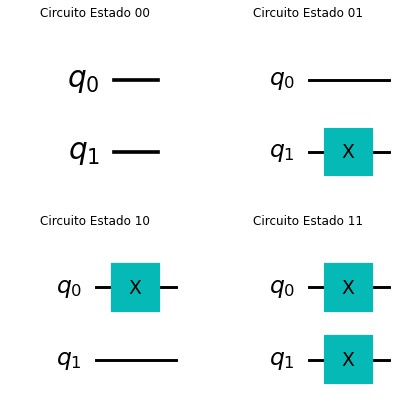

In [199]:
# Dibuja los circuitos en una cuadrícula
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

# Dibuja el primer circuito
circuit_drawer(base_c4("00"), output='mpl', ax=axs[0, 0])
axs[0, 0].set_title('Circuito Estado 00')

# Dibuja el segundo circuito
circuit_drawer(base_c4("01"), output='mpl', ax=axs[0, 1])
axs[0, 1].set_title('Circuito Estado 01')

# Dibuja el tercer circuito
circuit_drawer(base_c4("10"), output='mpl', ax=axs[1, 0])
axs[1, 0].set_title('Circuito Estado 10')

# Dibuja el cuarto circuito
circuit_drawer(base_c4("11"), output='mpl', ax=axs[1, 1])
axs[1, 1].set_title('Circuito Estado 11')

plt.show()

Representamos ahora los diferentes estados.

In [257]:
# Evaluamos el circuito
ket_00 = qk.execute(base_c4("00"), backend=qk.Aer.get_backend("statevector_simulator")).result().get_statevector()
ket_01 = qk.execute(base_c4("01"), backend=qk.Aer.get_backend("statevector_simulator")).result().get_statevector()
ket_10 = qk.execute(base_c4("10"), backend=qk.Aer.get_backend("statevector_simulator")).result().get_statevector()
ket_11 = qk.execute(base_c4("11"), backend=qk.Aer.get_backend("statevector_simulator")).result().get_statevector()

# Representamos el estado
# EStado
print("Estado: ")
ket_00.draw('latex')


Estado: 


<IPython.core.display.Latex object>

In [256]:
# Representamos el estado
# EStado
print("Estado: ")
ket_10.draw('latex')


Estado: 


<IPython.core.display.Latex object>

In [255]:
# Representamos el estado
# EStado
print("Estado: ")
ket_11.draw('latex')

Estado: 


<IPython.core.display.Latex object>

## Vectores Específicos

### 1. Hallar los vectores $\frac{1}{\sqrt{2}}|000\rangle + \frac{1}{\sqrt{2}}|111\rangle$, $\frac{i}{\sqrt{2}}|000\rangle - \frac{1}{\sqrt{2}}|111\rangle$, y $\frac{1}{\sqrt{2}}|000\rangle + \frac{i}{\sqrt{2}}|111\rangle$.

Para la obtención de estos estados haremos uso de diferences circuitos cuánticos sencillos.

#### 1. $\frac{1}{\sqrt{2}}|000\rangle + \frac{1}{\sqrt{2}}|111\rangle$:

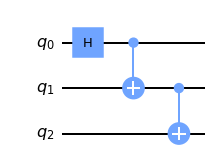

In [234]:
# Crearemos un circuito de 3 qubits
circuito = qk.QuantumCircuit(3)

# Aplicamos una puerta Hadamard al primer qubit
circuito.h(0)

# Aplicamos una puerta CNOT al primer y segundo qubit
circuito.cx(0,1)

# Aplicamos una puerta CNOT al segundo y tercer qubit
circuito.cx(1,2)

# Representamos el circuito
circuito.draw(output="mpl")


In [251]:
# Representamos el estado
ket = qk.execute(circuito, backend=qk.Aer.get_backend("statevector_simulator")).result().get_statevector()

# EStado
print("Estado: ")
ket.draw('latex')

Estado: 


<IPython.core.display.Latex object>

#### 2. $\frac{i}{\sqrt{2}}|000\rangle - \frac{1}{\sqrt{2}}|111\rangle$:

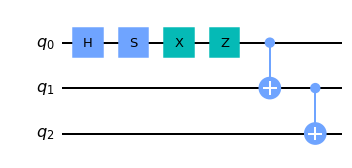

In [252]:
# Creamos un circuito de 3 qubits
circuito2 = qk.QuantumCircuit(3)

# Aplicamos una puerta Hadamard al primer qubit=
circuito2.h(0)
circuito2.s(0)
circuito2.x(0)
circuito2.z(0)

# Aplicamos una puerta CNOT al primer y segundo qubit
circuito2.cx(0,1)

# Aplicamos una puerta CNOT al segundo y tercer qubit
circuito2.cx(1,2)

# Representamos el circuito
circuito2.draw(output="mpl")

In [254]:
# Representamos el estado
ket = qk.execute(circuito2, backend=qk.Aer.get_backend("statevector_simulator")).result().get_statevector()

# EStado
print("Estado: ")
ket.draw('latex')


Estado: 


<IPython.core.display.Latex object>

#### 3. $\frac{1}{\sqrt{2}}|000\rangle + \frac{i}{\sqrt{2}}|111\rangle$

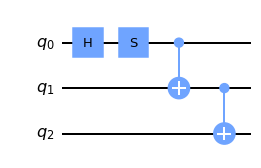

In [262]:
# Creamos un circuito de 3 qubits
circuito3 = qk.QuantumCircuit(3)

# Aplicamos una puerta Hadamard al primer qubit=
circuito3.h(0)
circuito3.s(0)

# Aplicamos una puerta CNOT al primer y segundo qubit
circuito3.cx(0,1)

# Aplicamos una puerta CNOT al segundo y tercer qubit
circuito3.cx(1,2)

# Representamos el circuito
circuito3.draw(output="mpl")


In [263]:
ket = qk.execute(circuito3, backend=qk.Aer.get_backend("statevector_simulator")).result().get_statevector()

# EStado
print("Estado: ")
ket.draw('latex')

Estado: 


<IPython.core.display.Latex object>